In [4]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.functional as F

初始化超参数

In [2]:
input_size = 784       # The image size = 28 x 28 = 784
hidden_size = 500      # The number of nodes at the hidden layer
num_classes = 10       # The number of output classes. In this case, from 0 to 9
num_epochs = 5         # The number of times entire dataset is trained
batch_size = 100       # The size of input data took for one iteration
learning_rate = 0.001  # The speed of convergence

下载数据集:
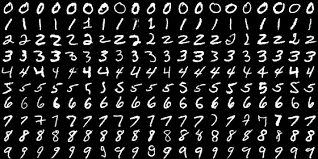

In [5]:
train_dataset = dsets.MNIST(root='./data',
                           train=True,
                           transform=transforms.ToTensor(),
                           download=True)

test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())

Processing...
Done!


加载数据集

In [6]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

构建fnn网络结构：
<img src="https://ask.qcloudimg.com/http-save/yehe-1565119/9s7n6g6jlw.png?imageView2/2/w/1620">

In [7]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()                    # Inherited from the parent class nn.Module
        self.fc1 = nn.Linear(input_size, hidden_size)  # 1st Full-Connected Layer: 784 (input data) -> 500 (hidden node)
        self.relu = nn.ReLU()                          # Non-Linear ReLU Layer: max(0,x)
        self.fc2 = nn.Linear(hidden_size, num_classes) # 2nd Full-Connected Layer: 500 (hidden node) -> 10 (output class)

    def forward(self, x):                              # Forward pass: stacking each layer together
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

实例化fnn

In [9]:
net = Net(input_size, hidden_size, num_classes)
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)


启用GPU

In [10]:
net.cuda()

Net(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

选择损失函数跟优化器

In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

开始训练

In [14]:
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):   # Load a batch of images with its (index, data, class)
        images = Variable(images.view(-1, 28*28))         # Convert torch tensor to Variable: change image from a vector of size 784 to a matrix of 28 x 28
        labels = Variable(labels)

        optimizer.zero_grad()                             # Intialize the hidden weight to all zeros
        outputs = net(images.cuda())                             # Forward pass: compute the output class given a image
        loss = criterion(outputs, labels.cuda())                 # Compute the loss: difference between the output class and the pre-given label
        loss.backward()                                   # Backward pass: compute the weight
        optimizer.step()                                  # Optimizer: update the weights of hidden nodes

        if (i+1) % 100 == 0:                              # Logging
            print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.data[0]))

/mnt/sdb/lh/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  


Epoch [1/5], Step [100/600], Loss: 0.4142
Epoch [1/5], Step [200/600], Loss: 0.2854
Epoch [1/5], Step [300/600], Loss: 0.2985
Epoch [1/5], Step [400/600], Loss: 0.1731
Epoch [1/5], Step [500/600], Loss: 0.2550
Epoch [1/5], Step [600/600], Loss: 0.1244
Epoch [2/5], Step [100/600], Loss: 0.0750
Epoch [2/5], Step [200/600], Loss: 0.0419
Epoch [2/5], Step [300/600], Loss: 0.0914
Epoch [2/5], Step [400/600], Loss: 0.1405
Epoch [2/5], Step [500/600], Loss: 0.1201
Epoch [2/5], Step [600/600], Loss: 0.0847
Epoch [3/5], Step [100/600], Loss: 0.0672
Epoch [3/5], Step [200/600], Loss: 0.1195
Epoch [3/5], Step [300/600], Loss: 0.0443
Epoch [3/5], Step [400/600], Loss: 0.1051
Epoch [3/5], Step [500/600], Loss: 0.0750
Epoch [3/5], Step [600/600], Loss: 0.0861
Epoch [4/5], Step [100/600], Loss: 0.0292
Epoch [4/5], Step [200/600], Loss: 0.0614
Epoch [4/5], Step [300/600], Loss: 0.0674
Epoch [4/5], Step [400/600], Loss: 0.0350
Epoch [4/5], Step [500/600], Loss: 0.0372
Epoch [4/5], Step [600/600], Loss:

测试：

In [17]:
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images.view(-1, 28*28))
    outputs = net(images.cuda())
    _, predicted = torch.max(outputs.data, 1)  # Choose the best class from the output: The class with the best score
    total += labels.size(0)                    # Increment the total count
    correct += (predicted == labels.cuda()).sum()     # Increment the correct count

print('Accuracy of the network on the 10K test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10K test images: 97 %
